# Part 2: Data Exploration 

#### In this part of the project, I will be analyzing our prepared dataset.

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.io as pio

In [73]:
df = pd.read_csv(r'/Users/MOON/Documents/data_projects/violence_data/cleaned_violence_df.csv', index_col=0)

In [74]:
# Here's another look at our dataset from part 1.
df.head()

,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,GDP per capita
0,Afghanistan,F,Education,Higher,... if she burns the food,2015,10.1,578.466353
1,Afghanistan,F,Education,Secondary,... if she burns the food,2015,13.7,578.466353
2,Afghanistan,F,Education,Primary,... if she burns the food,2015,13.8,578.466353
3,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015,13.8,578.466353
4,Afghanistan,F,Employment,Employed for kind,... if she burns the food,2015,17.0,578.466353


### Analyze the 'Education' demographic grouping.

#### https://www.usnews.com/opinion/knowledge-bank/2015/08/12/education-can-boost-gdp-even-more-than-we-thought 
This article explains the role of education in economic development. 
#### https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-8331-7
This article explains while there isn't a simple causal process for education and other factors, education can change family relations, childbearing decisions, and empower women (affecting survey results for our data).

In [75]:
# Let's look at the segments within the Education grouping.
education_df = df[df['Demographics Question'] == 'Education']
education_df['Demographics Response'].unique()

array(['Higher', 'Secondary', 'Primary', 'No education'], dtype=object)

In [76]:
# Let's look at the unique questions that were asked to survey respondents.
print('A husband is justified in hitting or beating his wife...')
education_df['Question'].unique()

A husband is justified in hitting or beating his wife...


array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [77]:
# Analyze each question across all countries (segmented by education level).
groupby_df = education_df.groupby(['Gender','Demographics Response','Question']).mean()
groupby_df

Survey Year  \
Gender Demographics Response Question                                               
F      Higher                ... for at least one specific reason     2012.796875   
                             ... if she argues with him               2012.746032   
                             ... if she burns the food                2012.746032   
                             ... if she goes out without telling him  2012.796875   
                             ... if she neglects the children         2012.796875   
                             ... if she refuses to have sex with him  2012.730159   
       No education          ... for at least one specific reason     2012.918033   
                             ... if she argues with him               2012.866667   
                             ... if she burns the food                2012.866667   
                             ... if she goes out without telling him  2012.918033   
                             ... if she neglects the children         2012.918033   
                             ... if she refuses to have sex with him  2012.850000   
       Primary               ... for at least one specific reason     2012.812500   
                             ... if she argues with him               2012.761905   
                             ... if she burns the food                2012.761905   
                             ... if she goes out without telling him  2012.812500   
                             ... if she neglects the children         2012.812500   
                             ... if she refuses to have sex with him  2012.746032   
       Secondary             ... for at least one specific reason     2012.723077   
                             ... if she argues with him               2012.671875   
                             ... if she burns the food                2012.671875   
                             ... if she goes out without telling him  2012.723077   
                             ... if she neglects the children         2012.723077   
                             ... if she refuses to have sex with him  2012.656250   
M      Higher                ... for at least one specific reason     2013.454545   
                             ... if she argues with him               2013.407407   
                             ... if she burns the food                2013.407407   
                             ... if she goes out without telling him  2013.454545   
                             ... if she neglects the children         2013.454545   
                             ... if she refuses to have sex with him  2013.388889   
       No education          ... for at least one specific reason     2013.900000   
                             ... if she argues with him               2013.857143   
                             ... if she burns the food                2013.857143   
                             ... if she goes out without telling him  2013.900000   
                             ... if she neglects the children         2013.900000   
                             ... if she refuses to have sex with him  2013.836735   
       Primary               ... for at least one specific reason     2013.921569   
                             ... if she argues with him               2013.880000   
                             ... if she burns the food                2013.880000   
                             ... if she goes out without telling him  2013.921569   
                             ... if she neglects the children         2013.921569   
                             ... if she refuses to have sex with him  2013.860000   
       Secondary             ... for at least one specific reason     2013.454545   
                             ... if she argues with him               2013.407407   
                             ... if she burns the food                2013.407407   
                             ... if she goes out without telling him  2013.

In [78]:
# Since the groupby_df was obtained across all countries, the GDP per capita column won't be of much use.
groupby_df = groupby_df.drop('GDP per capita', axis=1).drop(['Survey Year'], axis=1)
groupby_df

Value
Gender Demographics Response Question                                          
F      Higher                ... for at least one specific reason     17.262500
                             ... if she argues with him                8.117460
                             ... if she burns the food                 3.093651
                             ... if she goes out without telling him   8.670312
                             ... if she neglects the children         11.945313
                             ... if she refuses to have sex with him   4.839683
       No education          ... for at least one specific reason     44.034426
                             ... if she argues with him               29.078333
                             ... if she burns the food                17.265000
                             ... if she goes out without telling him  30.485246
                             ... if she neglects the children         32.619672
                             ... if she refuses to have sex with him  23.498333
       Primary               ... for at least one specific reason     40.667188
                             ... if she argues with him               24.757143
                             ... if she burns the food                14.039683
                             ... if she goes out without telling him  26.517187
                             ... if she neglects the children         29.984375
                             ... if she refuses to have sex with him  18.295238
       Secondary             ... for at least one specific reason     31.932308
                             ... if she argues with him               17.620313
                             ... if she burns the food                 8.607812
                             ... if she goes out without telling him  18.643077
                             ... if she neglects the children         23.526154
                             ... if she refuses to have sex with him  11.209375
M      Higher                ... for at least one specific reason     15.729091
                             ... if she argues with him                7.207407
                             ... if she burns the food                 2.511111
                             ... if she goes out without telling him   7.910909
                             ... if she neglects the children         10.212727
                             ... if she refuses to have sex with him   3.170370
       No education          ... for at least one specific reason     32.152000
                             ... if she argues with him               18.887755
                             ... if she burns the food                 8.126531
                             ... if she goes out without telling him  19.082000
                             ... if she neglects the children         21.396000
                             ... if she refuses to have sex with him  12.136735
       Primary               ... for at least one specific reason     30.984314
                             ... if she argues with him               17.162000
                             ... if she burns the food                 7.326000
                             ... if she goes out without telling him  17.150980
                             ... if she neglects the children         20.115686
                             ... if she refuses to have sex with him   9.746000
       Secondary             ... for at least one specific reason     27.169091
                             ... if she argues with him               14.070370
                             ... if she burns the food                 5.292593
                             ... if she goes out without telling him  14.129091
                             ... if she neglects the children         18.189091
                             ... if she refuses to have sex with him   6.774074

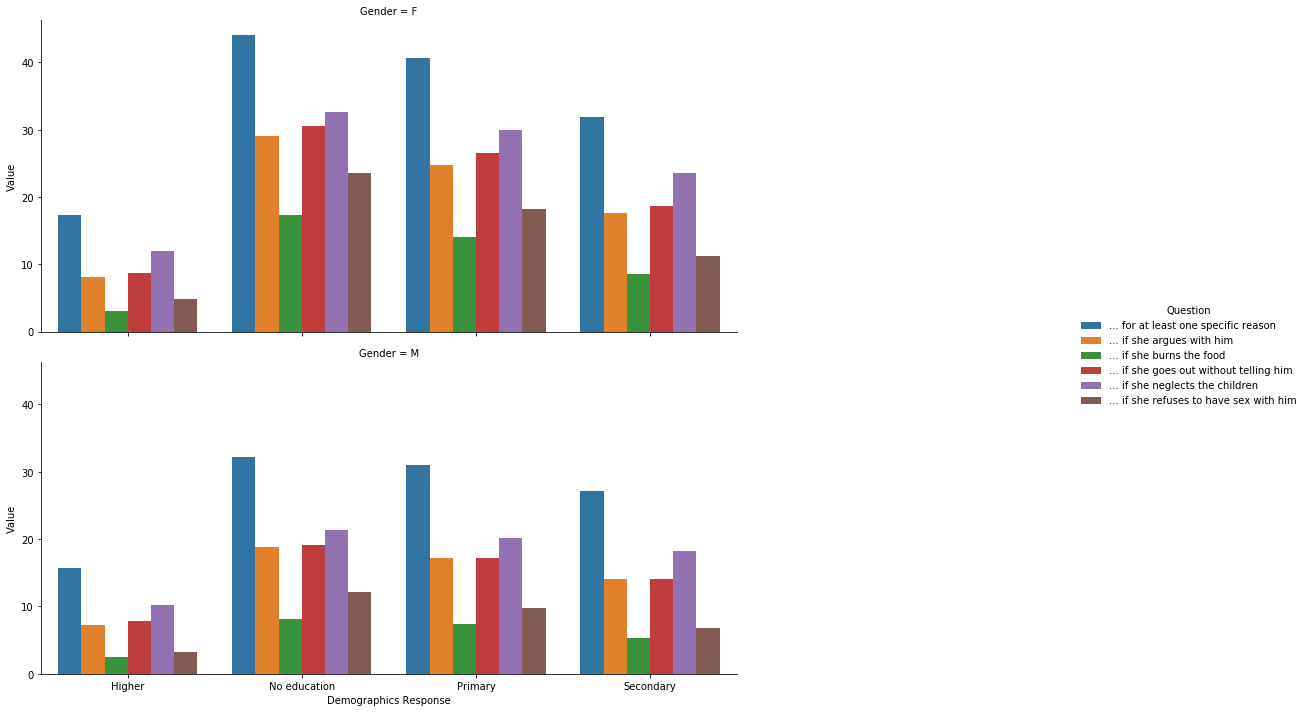

In [103]:
# Now, visualize this data on a barplot.
data = groupby_df.reset_index()
g = sns.catplot(x='Demographics Response', y='Value', hue='Question', row='Gender', data=data, kind='bar')
g.fig.set_figwidth(20)
g.fig.set_figheight(10)


#### There does seem to be a drop-off with an increased length of education. Here are some other interesting things to note:
#### * Recall that value here means percentage of agreement with the question being asked
* The question with the highest value was '...for at least one specific reason', while the question with the lowest value was '...if she burns the food'(for both genders)
* Both males and females follow the exact same trends when it comes to the questions asked (comparative values for each education level)
* Females seem to have higher values (at all levels of education) for every question


### Now, let's factor in countries into the analysis by manipulating our current dataset.

In [177]:
# Calculate an 'average' agreement value for each demographic segment within each country (also segmented by gender).
df_average_values = pd.DataFrame(data=None, columns=['Gender','Demographics Response','Survey Year', 'Value', 'GDP per capita','Country'])
countries = education_df['Country'].unique()

for country in countries:
    temp_df = education_df[education_df['Country'] == country].groupby(['Gender','Demographics Response']).mean().reset_index()
    temp_df['Country'] = country
    df_average_values = df_average_values.append(temp_df, ignore_index=True)

df_average_values

,Gender,Demographics Response,Survey Year,Value,GDP per capita,Country
0,F,Higher,2015,32.366667,578.466353,Afghanistan
1,F,No education,2015,51.966667,578.466353,Afghanistan
2,F,Primary,2015,50.183333,578.466353,Afghanistan
3,F,Secondary,2015,45.716667,578.466353,Afghanistan
4,M,Higher,2015,27.966667,578.466353,Afghanistan
...,...,...,...,...,...,...
460,F,Secondary,2015,19.083333,1445.071062,Zimbabwe
461,M,Higher,2015,5.850000,1445.071062,Zimbabwe
462,M,No education,2015,26.883333,1445.071062,Zimbabwe
463,M,Primary,2015,20.700000,1445.071062,Zimbabwe


In [179]:
# Clean and reformat dataframe.
df_average_values = df_average_values.drop('Survey Year', axis=1)
first_col = df_average_values.pop('Country')
df_average_values.insert(0, 'Country', first_col)

df_average_values.head()

,Country,Gender,Demographics Response,Value,GDP per capita
0,Afghanistan,F,Higher,32.366667,578.466353
1,Afghanistan,F,No education,51.966667,578.466353
2,Afghanistan,F,Primary,50.183333,578.466353
3,Afghanistan,F,Secondary,45.716667,578.466353
4,Afghanistan,M,Higher,27.966667,578.466353


### Now that our data is in the format we want, we can now analyze it.

In [191]:
# Let's look at the information for the country with the lowest and highest value.
print(df_average_values.loc[df_average_values['Value'].argmin()])

print(df_average_values.loc[df_average_values['Value'].argmax()])

Country                  Dominican Republic
Gender                                    F
Demographics Response                Higher
Value                              0.233333
GDP per capita                      6238.13
Name: 116, dtype: object
Country                       Morocco
Gender                              F
Demographics Response    No education
Value                         62.1167
GDP per capita                1725.46
Name: 291, dtype: object


#### As expected, the demographics response for the lowest value is higher education and the demographics reponse from the highest value is no education.

In [197]:
# Determine GDP per capita ranking of Dominican Republic and Morocco.
# First, return ranking of all countries for reference.
gdp_df = df_average_values.drop(['Gender','Demographics Response','Value'],axis=1)
gdp_df = gdp_df.drop_duplicates(subset=['Country'])
gdp_df.sort_values(by=['GDP per capita'], inplace=True, ascending=False)

In [207]:
# GDP per capita sorted.
gdp_df.reset_index(drop=True, inplace=True)
gdp_df

,Country,GDP per capita
0,Turkey,12519.391430
1,Gabon,9813.477703
2,Maldives,9209.288625
3,Peru,6528.972218
4,Dominican Republic,6238.133608
...,...,...
60,Madagascar,536.351459
61,Niger,526.350966
62,Malawi,380.597033
63,Eritrea,293.955791


In [211]:
gdp_df[gdp_df['Country'] == 'Dominican Republic']

,Country,GDP per capita
4,Dominican Republic,6238.133608


In [212]:
gdp_df[gdp_df['Country'] == 'Morocco']

,Country,GDP per capita
23,Morocco,1725.458038


#### So the Dominican Republic (lowest value) has the 5th highest GDP per capita, and Morocco (highest value) has the 24th highest GDP per capita. This could mean that there isn't a simple causal relationship between GDP per capita and the country's view on violence towards women (i.e. lower GDP -> higher value). There are other factors at play here (such as sociocultural, structural, etc.)

### Now, let's compare global values for women/men with varying levels of education.

In [241]:
# Calculate the global average value for women with varying levels of education.
df_average_values[(df_average_values['Gender'] == 'F')].groupby('Demographics Response').mean().drop('GDP per capita', axis=1)

,Value
Demographics Response,
Higher,9.011667
No education,29.417486
Primary,25.672839
Secondary,18.584897


In [242]:
# Calculate the global average value for men with varying levels of education.
df_average_values[(df_average_values['Gender'] == 'M')].groupby('Demographics Response').mean().drop('GDP per capita', axis=1)

,Value
Demographics Response,
Higher,7.831333
No education,18.623967
Primary,17.068856
Secondary,14.319182


#### This confirms what we saw in the bar chart above: women are more likely (have higher values) than men and are more likely to accept that violent actions against women are justifiable.

In [261]:
# Now, plot data for women with higher levels of education.

fig = px.choropleth(df_average_values, scope='world', color='Value', labels={'Value':'% Agreement'},
                   locations=df_average_values['Country'], locationmode='country names', color_continuous_scale='piyg',
                    hover_data=['Country','Value','Demographics Response','Gender', 'GDP per capita'],title='Global Values for Women with Higher Levels of Education')

fig.show()

In [245]:
# The average value for women with higher levels of education.
df_average_values[(df_average_values['Gender'] == 'F') & (df_average_values['Demographics Response'] == 'Higher')].mean()

Value                9.011667
GDP per capita    2322.336091
dtype: float64

### That's it for this project! 